***Predicting Breast Cancer Using Artificial Neural Networks***

We use features extracted from digitized images of cell nuclei to build a model that predicts whether a tumor is benign or malignant. The classification is as follows:

1 = Malignant (Cancerous) - Present (M)
0 = Benign (Not Cancerous) - Absent (B)


Data Loading and Preparation

In [66]:
import pandas as pd 
df = pd.read_csv(r'C:\Users\User\Downloads\DL-ASSIGN 4\data (2).csv')

In [67]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [68]:
#dropping unnecessary features
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [69]:
#checking for missing values 
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No null values 

In [70]:
# Convert diagnosis to numerical values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


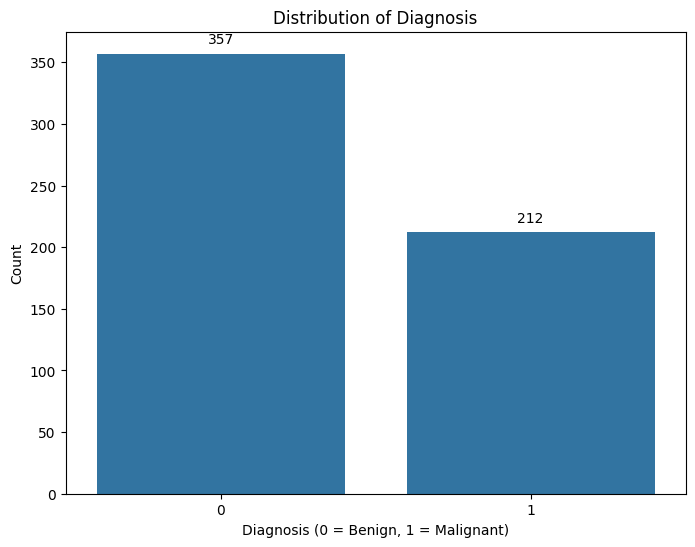

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df)

# Adding the number of 0s and 1s on the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis')
plt.show()

In [72]:
# Split the dataset into features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [78]:
from sklearn.model_selection import train_test_split
# Split the dataset into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [74]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

*Feature Selection*

In [75]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply feature selection
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)

# Get feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))


                    Feature       Score
27     concave points_worst  746.492117
7       concave points_mean  695.179785
22          perimeter_worst  681.263759
20             radius_worst  645.350668
2            perimeter_mean  522.489267
23               area_worst  495.787667
0               radius_mean  482.233945
3                 area_mean  423.654133
6            concavity_mean  396.662370
26          concavity_worst  331.330906
5          compactness_mean  242.589647
25        compactness_worst  240.492785
10                radius_se  186.591816
12             perimeter_se  176.223231
13                  area_se  165.307401
21            texture_worst  126.681903
28           symmetry_worst  108.953927
24         smoothness_worst  102.973429
1              texture_mean   94.917788
17        concave points_se   76.565923
4           smoothness_mean   74.190147
8             symmetry_mean   62.469542
29  fractal_dimension_worst   49.197922
15           compactness_se   31.338791


*Grid Search Cross-Validation*

In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
mlp = MLPClassifier()

# Define the grid of hyperparameters
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'adam'}


c:\Users\User\Downloads\DL-ASSIGN 4\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN Model Creation

In [79]:
from sklearn.metrics import classification_report, accuracy_score
# Create the ANN model with the best parameters
best_params = grid_search.best_params_
ann_model = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    solver=best_params['solver'],
    alpha=best_params['alpha'],
    learning_rate=best_params['learning_rate']
)


# Train the model on the full training data (including validation set)
ann_model.fit(X_train_full, y_train_full)

# Evaluate the model on the test set
y_pred = ann_model.predict(X_test)
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))
print("Classification Report on test set:\n", classification_report(y_test, y_pred))

Accuracy on test set:  0.9473684210526315
Classification Report on test set:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96        71
           1       0.89      0.98      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



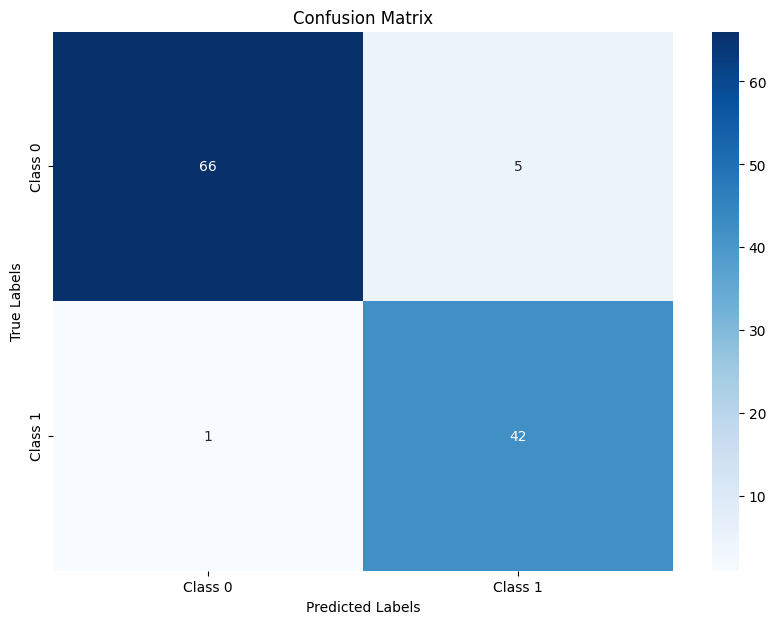

In [84]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [86]:
import pickle

# Save the model
with open('ann_model.pkl', 'wb') as file:
    pickle.dump(ann_model, file)
